In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sistema de recomendacion de peliculas
## Cargamos los datos

In [52]:
movies = pd.read_csv('../data/ml-latest-small/movies.csv', index_col=0)
ratings = pd.read_csv('../data/ml-latest-small/ratings.csv')


In [53]:
movies.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [54]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Exploracion inicial
¿Qué película tiene el mayor rating promedio?

In [55]:
mean_rating = ratings.groupby('movieId').rating.mean()
rating_counts = ratings.groupby('movieId').rating.count()
top10Ids = mean_rating[rating_counts > 100].sort_values(ascending=False)[:10].index # Nos quedamos solo con las que tengan al menos 100 reviews
movies.loc[top10Ids, :]

,title,genres
movieId,,
318,"Shawshank Redemption, The (1994)",Crime|Drama
858,"Godfather, The (1972)",Crime|Drama
2959,Fight Club (1999),Action|Crime|Drama|Thriller
1221,"Godfather: Part II, The (1974)",Crime|Drama
48516,"Departed, The (2006)",Crime|Drama|Thriller
1213,Goodfellas (1990),Crime|Drama
58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX
50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance


### Ejercicio: ¿Cuantas peliculas vio un usuario promedio?

In [ ]:
# Completar aca:

## Entrenamos el modelo para distintos de la dimension del embedding

Separamos en entrenamiento y testeo

In [56]:
from surprise import NormalPredictor, SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate, train_test_split


# Definimos un lector para los datos
reader = Reader(rating_scale=(0.5, 5))

# Cargamos los datos a partir del dataframe
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2)

In [57]:
# Entrenamos el modelo
recommender = SVD()
recommender.fit(trainset)
predictions = recommender.test(testset)

### Calculemos el error

In [59]:
predictions

[Prediction(uid=219, iid=1552, r_ui=3.0, est=2.458679019128854, details={'was_impossible': False}),
 Prediction(uid=590, iid=58103, r_ui=2.5, est=3.2269385771221306, details={'was_impossible': False}),
 Prediction(uid=365, iid=145935, r_ui=1.5, est=2.677167665089882, details={'was_impossible': False}),
 Prediction(uid=382, iid=33836, r_ui=2.0, est=2.7288789800107773, details={'was_impossible': False}),
 Prediction(uid=596, iid=5459, r_ui=2.5, est=3.057186143298491, details={'was_impossible': False}),
 Prediction(uid=282, iid=52973, r_ui=4.0, est=3.97923255170831, details={'was_impossible': False}),
 Prediction(uid=365, iid=102123, r_ui=4.0, est=2.8237000519654565, details={'was_impossible': False}),
 Prediction(uid=91, iid=3563, r_ui=3.0, est=3.2274320464053967, details={'was_impossible': False}),
 Prediction(uid=365, iid=7438, r_ui=3.5, est=2.9970140801932295, details={'was_impossible': False}),
 Prediction(uid=559, iid=165, r_ui=3.0, est=3.5153835904153157, details={'was_impossible':

In [60]:
# Pasamos el resultado a un dataframe
df = pd.DataFrame([(p.uid, p.iid, p.r_ui, p.est) for p in predictions], columns=['userId', 'movieId', 'real_rating', 'predicted_rating'])

In [61]:
df.head()

,userId,movieId,real_rating,predicted_rating
0,219,1552,3.0,2.458679
1,590,58103,2.5,3.226939
2,365,145935,1.5,2.677168
3,382,33836,2.0,2.728879
4,596,5459,2.5,3.057186


In [62]:
# Calculamos el RMSE (Root mean squared error)
rmse = np.sqrt(np.mean((df['real_rating'] - df['predicted_rating']) ** 2))
rmse

0.8744992393947225

## Exploramos los parametros del modelo

In [49]:
# Ya viene con una funcion para hacer crossvalidation
n_factors = np.arange(1, 50, 5)
metricas = []
for n in n_factors: # Probamos distintas dimensiones del espacio de embedding
    print(n)
    m = cross_validate(SVD(n_factors=n), data, cv=2)
    metricas.append(m)

1
6
11
16
21
26
31
36
41
46


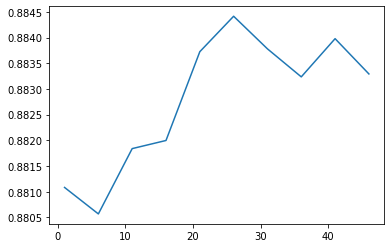

In [50]:
plt.plot(n_factors, [np.mean(m['test_rmse']) for m in metricas])

### ^-----   ¿Tiene un impacto importante?

## Ejercicio: Explorar otros parametros del modelo

Lean la documentacion de la implementacion de SVD en surprise https://surprise.readthedocs.io/en/stable/matrix_factorization.html

¿Que otros parámetros pueden variar? Exploren 2 parametros distintos

## Ejercicio: Explorar otros modelos

Lean la documentacion de la implementacion modelos en surprise https://surprise.readthedocs.io/en/stable/prediction_algorithms_package.html

Prueben un modelo distinto y comparenlo

## Ejercicio: RECOMENDAR PELICULAS! 

Armar una funcion que recomiende peliculas a usuarios. Mas abajo tienen una guia

In [ ]:



def recomendar_a_usuario(user_id, modelo, id_peliculas, movies, ratings):
    """Recomienda las 10 mejores peliculas para un usuario
    
    Parameters
    ----------
    user_id : int
        Id del usuario para el cual se genera la recomendacion
    modelo : SupriseModel
        Modelo a usar para hacer la prediccion
    id_peliculas : list of int
        lista de ids de peliculas sobre las que haremos la prediccion
    movies : pd.DataFrame
        Metadatos de la pelicula (incluye el titulo)
    ratings : pd.DataFrame
        ratings ya hechos por los usuarios
    Returns: list
        Devuelve una lista de titulos de peliculas recomendadas
    """
    
    # Crear la lista de tuplas [ (user_id, pelicula_id, 1)] con user_id fijo
    para_predecir = [ ( , , ) for x in id_peliculas ] # completar
    
    predicciones = model.test(para_predecir) # Hacemos la prediccion
    
    ## Extraer el id de las 10 peliculas con rating mas alto que NO hayan sido vistas ya por el usuario
    # completar
    
    # Convertir a titulos
    # completar
    
    
    return top_10_titulos